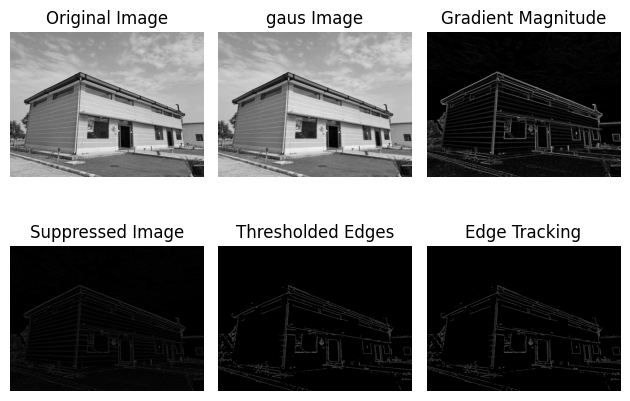

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('anpurna.jpg', cv2.IMREAD_GRAYSCALE)

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

#noice
gaus_blr = cv2.GaussianBlur(image, (5, 5), 3)
plt.subplot(2, 3, 2)
plt.imshow(gaus_blr, cmap='gray')
plt.title('gaus Image')
plt.axis('off')

gradx = cv2.Sobel(gaus_blr, cv2.CV_64F, 1, 0, ksize=3)
grady = cv2.Sobel(gaus_blr, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(gradx**2 + grady**2)
grad_mag = np.uint8(255 * grad_mag / grad_mag.max())
plt.subplot(2, 3, 3)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
grad_dir = np.arctan2(grady, gradx)
grad_dir = np.degrees(grad_dir)
grad_dir = (grad_dir + 180) % 180

def non_maximum_suppression(grad_mag, grad_dir):
    rows, cols = grad_mag.shape
    result = np.zeros_like(grad_mag)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_dir[i, j]
            if (0 <= angle < 22) or (157 <= angle <= 180):
                neighbors = [grad_mag[i, j - 1], grad_mag[i, j + 1]]
            elif (22 <= angle < 67):
                neighbors = [grad_mag[i - 1, j - 1], grad_mag[i + 1, j + 1]]
            elif (67 <= angle < 112):
                neighbors = [grad_mag[i - 1, j], grad_mag[i + 1, j]]
            else:
                neighbors = [grad_mag[i - 1, j + 1], grad_mag[i + 1, j - 1]]
            
            if grad_mag[i, j] >= max(neighbors):
                result[i, j] = grad_mag[i, j]
    
    return result

sup_img = non_maximum_suppression(grad_mag, grad_dir)
plt.subplot(2, 3, 4)
plt.imshow(sup_img, cmap='gray')
plt.title('Suppressed Image')
plt.axis('off')


low_threshold = 75
high_threshold = 195
edge_thresholded = np.zeros_like(sup_img)
edge_thresholded[(sup_img >= low_threshold) & (sup_img <= high_threshold)] = 255
plt.subplot(2, 3, 5)
plt.imshow(edge_thresholded, cmap='gray')
plt.title('Thresholded Edges')
plt.axis('off')


def hysteresis(edges, low_threshold, high_threshold):
    rows, cols = edges.shape
    visited = np.zeros((rows, cols), dtype=np.uint8)

    def track_edge(i, j):
        if i < 0 or i >= rows or j < 0 or j >= cols or visited[i, j]:
            return
        visited[i, j] = 255
        if low_threshold <= edges[i, j] <= high_threshold:
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    track_edge(i + dx, j + dy)

    for i in range(rows):
        for j in range(cols):
            if edges[i, j] > high_threshold and not visited[i, j]:
                track_edge(i, j)

    return visited

result = hysteresis(edge_thresholded, low_threshold, high_threshold)
plt.subplot(2, 3, 6)
plt.imshow(result, cmap='gray')
plt.title('Edge Tracking')
plt.axis('off')

plt.tight_layout()
plt.show()


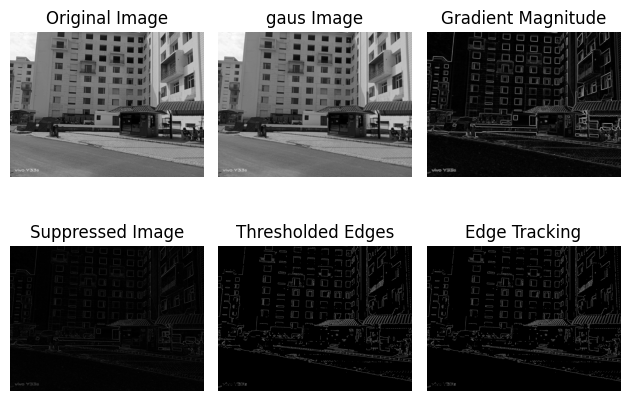

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic 1.jpg', cv2.IMREAD_GRAYSCALE)

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

#noice
gaus_blr = cv2.GaussianBlur(image, (5, 5), 2)
plt.subplot(2, 3, 2)
plt.imshow(gaus_blr, cmap='gray')
plt.title('gaus Image')
plt.axis('off')

gradx = cv2.Sobel(gaus_blr, cv2.CV_64F, 1, 0, ksize=3)
grady = cv2.Sobel(gaus_blr, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(gradx**2 + grady**2)
grad_mag = np.uint8(255 * grad_mag / grad_mag.max())
plt.subplot(2, 3, 3)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
grad_dir = np.arctan2(grady, gradx)
grad_dir = np.degrees(grad_dir)
grad_dir = (grad_dir + 180) % 180

def non_maximum_suppression(grad_mag, grad_dir):
    rows, cols = grad_mag.shape
    result = np.zeros_like(grad_mag)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_dir[i, j]
            if (0 <= angle < 22) or (157 <= angle <= 180):
                neighbors = [grad_mag[i, j - 1], grad_mag[i, j + 1]]
            elif (22 <= angle < 67):
                neighbors = [grad_mag[i - 1, j - 1], grad_mag[i + 1, j + 1]]
            elif (67 <= angle < 112):
                neighbors = [grad_mag[i - 1, j], grad_mag[i + 1, j]]
            else:
                neighbors = [grad_mag[i - 1, j + 1], grad_mag[i + 1, j - 1]]
            
            if grad_mag[i, j] >= max(neighbors):
                result[i, j] = grad_mag[i, j]
    
    return result

sup_img = non_maximum_suppression(grad_mag, grad_dir)
plt.subplot(2, 3, 4)
plt.imshow(sup_img, cmap='gray')
plt.title('Suppressed Image')
plt.axis('off')


low_threshold = 55
high_threshold = 155
edge_thresholded = np.zeros_like(sup_img)
edge_thresholded[(sup_img >= low_threshold) & (sup_img <= high_threshold)] = 255
plt.subplot(2, 3, 5)
plt.imshow(edge_thresholded, cmap='gray')
plt.title('Thresholded Edges')
plt.axis('off')


def hysteresis(edges, low_threshold, high_threshold):
    rows, cols = edges.shape
    visited = np.zeros((rows, cols), dtype=np.uint8)

    def track_edge(i, j):
        if i < 0 or i >= rows or j < 0 or j >= cols or visited[i, j]:
            return
        visited[i, j] = 255
        if low_threshold <= edges[i, j] <= high_threshold:
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    track_edge(i + dx, j + dy)

    for i in range(rows):
        for j in range(cols):
            if edges[i, j] > high_threshold and not visited[i, j]:
                track_edge(i, j)

    return visited

result = hysteresis(edge_thresholded, low_threshold, high_threshold)
plt.subplot(2, 3, 6)
plt.imshow(result, cmap='gray')
plt.title('Edge Tracking')
plt.axis('off')

plt.tight_layout()
plt.show()


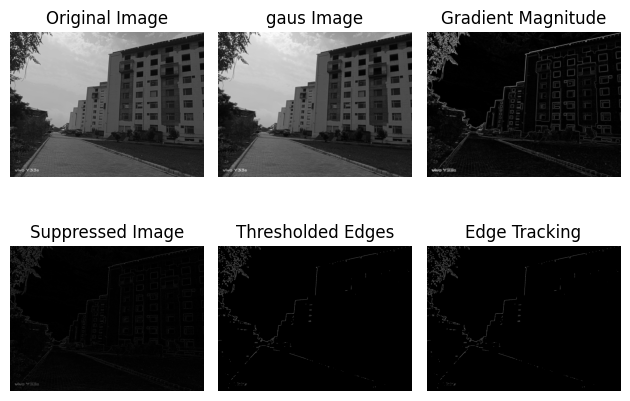

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic 2.jpg', cv2.IMREAD_GRAYSCALE)

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

#noice
gaus_blr = cv2.GaussianBlur(image, (5, 5), 4)
plt.subplot(2, 3, 2)
plt.imshow(gaus_blr, cmap='gray')
plt.title('gaus Image')
plt.axis('off')

gradx = cv2.Sobel(gaus_blr, cv2.CV_64F, 1, 0, ksize=3)
grady = cv2.Sobel(gaus_blr, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(gradx**2 + grady**2)
grad_mag = np.uint8(255 * grad_mag / grad_mag.max())
plt.subplot(2, 3, 3)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
grad_dir = np.arctan2(grady, gradx)
grad_dir = np.degrees(grad_dir)
grad_dir = (grad_dir + 180) % 180

def non_maximum_suppression(grad_mag, grad_dir):
    rows, cols = grad_mag.shape
    result = np.zeros_like(grad_mag)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_dir[i, j]
            if (0 <= angle < 22) or (157 <= angle <= 180):
                neighbors = [grad_mag[i, j - 1], grad_mag[i, j + 1]]
            elif (22 <= angle < 67):
                neighbors = [grad_mag[i - 1, j - 1], grad_mag[i + 1, j + 1]]
            elif (67 <= angle < 112):
                neighbors = [grad_mag[i - 1, j], grad_mag[i + 1, j]]
            else:
                neighbors = [grad_mag[i - 1, j + 1], grad_mag[i + 1, j - 1]]
            
            if grad_mag[i, j] >= max(neighbors):
                result[i, j] = grad_mag[i, j]
    
    return result

sup_img = non_maximum_suppression(grad_mag, grad_dir)
plt.subplot(2, 3, 4)
plt.imshow(sup_img, cmap='gray')
plt.title('Suppressed Image')
plt.axis('off')


low_threshold = 85
high_threshold = 150
edge_thresholded = np.zeros_like(sup_img)
edge_thresholded[(sup_img >= low_threshold) & (sup_img <= high_threshold)] = 255
plt.subplot(2, 3, 5)
plt.imshow(edge_thresholded, cmap='gray')
plt.title('Thresholded Edges')
plt.axis('off')


def hysteresis(edges, low_threshold, high_threshold):
    rows, cols = edges.shape
    visited = np.zeros((rows, cols), dtype=np.uint8)

    def track_edge(i, j):
        if i < 0 or i >= rows or j < 0 or j >= cols or visited[i, j]:
            return
        visited[i, j] = 255
        if low_threshold <= edges[i, j] <= high_threshold:
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    track_edge(i + dx, j + dy)

    for i in range(rows):
        for j in range(cols):
            if edges[i, j] > high_threshold and not visited[i, j]:
                track_edge(i, j)

    return visited

result = hysteresis(edge_thresholded, low_threshold, high_threshold)
plt.subplot(2, 3, 6)
plt.imshow(result, cmap='gray')
plt.title('Edge Tracking')
plt.axis('off')

plt.tight_layout()
plt.show()


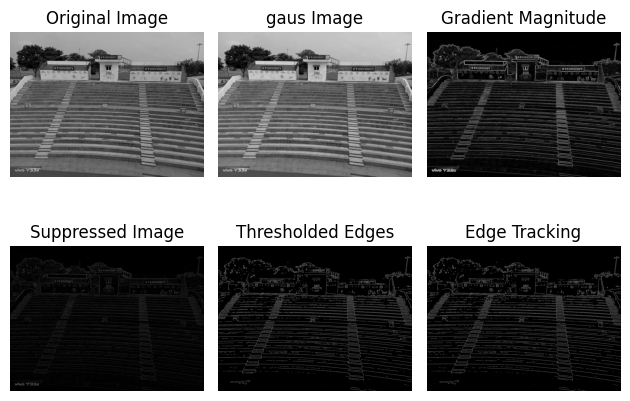

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic3.jpg', cv2.IMREAD_GRAYSCALE)

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

#noice
gaus_blr = cv2.GaussianBlur(image, (5, 5), 2.5)
plt.subplot(2, 3, 2)
plt.imshow(gaus_blr, cmap='gray')
plt.title('gaus Image')
plt.axis('off')

gradx = cv2.Sobel(gaus_blr, cv2.CV_64F, 1, 0, ksize=3)
grady = cv2.Sobel(gaus_blr, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(gradx**2 + grady**2)
grad_mag = np.uint8(255 * grad_mag / grad_mag.max())
plt.subplot(2, 3, 3)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
grad_dir = np.arctan2(grady, gradx)
grad_dir = np.degrees(grad_dir)
grad_dir = (grad_dir + 180) % 180

def non_maximum_suppression(grad_mag, grad_dir):
    rows, cols = grad_mag.shape
    result = np.zeros_like(grad_mag)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_dir[i, j]
            if (0 <= angle < 22) or (157 <= angle <= 180):
                neighbors = [grad_mag[i, j - 1], grad_mag[i, j + 1]]
            elif (22 <= angle < 67):
                neighbors = [grad_mag[i - 1, j - 1], grad_mag[i + 1, j + 1]]
            elif (67 <= angle < 112):
                neighbors = [grad_mag[i - 1, j], grad_mag[i + 1, j]]
            else:
                neighbors = [grad_mag[i - 1, j + 1], grad_mag[i + 1, j - 1]]
            
            if grad_mag[i, j] >= max(neighbors):
                result[i, j] = grad_mag[i, j]
    
    return result

sup_img = non_maximum_suppression(grad_mag, grad_dir)
plt.subplot(2, 3, 4)
plt.imshow(sup_img, cmap='gray')
plt.title('Suppressed Image')
plt.axis('off')


low_threshold = 60
high_threshold = 160
edge_thresholded = np.zeros_like(sup_img)
edge_thresholded[(sup_img >= low_threshold) & (sup_img <= high_threshold)] = 255
plt.subplot(2, 3, 5)
plt.imshow(edge_thresholded, cmap='gray')
plt.title('Thresholded Edges')
plt.axis('off')


def hysteresis(edges, low_threshold, high_threshold):
    rows, cols = edges.shape
    visited = np.zeros((rows, cols), dtype=np.uint8)

    def track_edge(i, j):
        if i < 0 or i >= rows or j < 0 or j >= cols or visited[i, j]:
            return
        visited[i, j] = 255
        if low_threshold <= edges[i, j] <= high_threshold:
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    track_edge(i + dx, j + dy)

    for i in range(rows):
        for j in range(cols):
            if edges[i, j] > high_threshold and not visited[i, j]:
                track_edge(i, j)

    return visited

result = hysteresis(edge_thresholded, low_threshold, high_threshold)
plt.subplot(2, 3, 6)
plt.imshow(result, cmap='gray')
plt.title('Edge Tracking')
plt.axis('off')

plt.tight_layout()
plt.show()


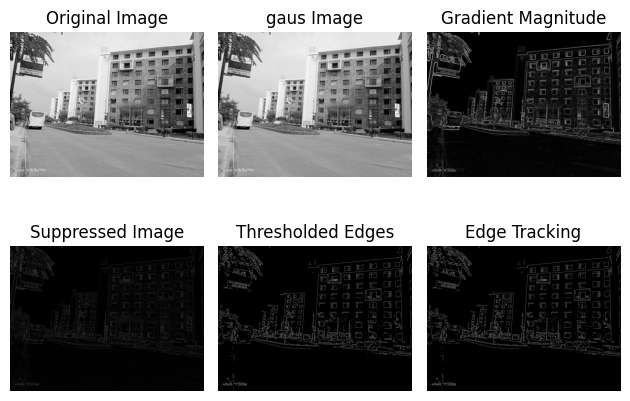

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic 4.jpg', cv2.IMREAD_GRAYSCALE)

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

#noice
gaus_blr = cv2.GaussianBlur(image, (5, 5), 2)
plt.subplot(2, 3, 2)
plt.imshow(gaus_blr, cmap='gray')
plt.title('gaus Image')
plt.axis('off')

gradx = cv2.Sobel(gaus_blr, cv2.CV_64F, 1, 0, ksize=3)
grady = cv2.Sobel(gaus_blr, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(gradx**2 + grady**2)
grad_mag = np.uint8(255 * grad_mag / grad_mag.max())
plt.subplot(2, 3, 3)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
grad_dir = np.arctan2(grady, gradx)
grad_dir = np.degrees(grad_dir)
grad_dir = (grad_dir + 180) % 180

def non_maximum_suppression(grad_mag, grad_dir):
    rows, cols = grad_mag.shape
    result = np.zeros_like(grad_mag)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_dir[i, j]
            if (0 <= angle < 22) or (157 <= angle <= 180):
                neighbors = [grad_mag[i, j - 1], grad_mag[i, j + 1]]
            elif (22 <= angle < 67):
                neighbors = [grad_mag[i - 1, j - 1], grad_mag[i + 1, j + 1]]
            elif (67 <= angle < 112):
                neighbors = [grad_mag[i - 1, j], grad_mag[i + 1, j]]
            else:
                neighbors = [grad_mag[i - 1, j + 1], grad_mag[i + 1, j - 1]]
            
            if grad_mag[i, j] >= max(neighbors):
                result[i, j] = grad_mag[i, j]
    
    return result

sup_img = non_maximum_suppression(grad_mag, grad_dir)
plt.subplot(2, 3, 4)
plt.imshow(sup_img, cmap='gray')
plt.title('Suppressed Image')
plt.axis('off')


low_threshold = 60
high_threshold = 180
edge_thresholded = np.zeros_like(sup_img)
edge_thresholded[(sup_img >= low_threshold) & (sup_img <= high_threshold)] = 255
plt.subplot(2, 3, 5)
plt.imshow(edge_thresholded, cmap='gray')
plt.title('Thresholded Edges')
plt.axis('off')


def hysteresis(edges, low_threshold, high_threshold):
    rows, cols = edges.shape
    visited = np.zeros((rows, cols), dtype=np.uint8)

    def track_edge(i, j):
        if i < 0 or i >= rows or j < 0 or j >= cols or visited[i, j]:
            return
        visited[i, j] = 255
        if low_threshold <= edges[i, j] <= high_threshold:
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    track_edge(i + dx, j + dy)

    for i in range(rows):
        for j in range(cols):
            if edges[i, j] > high_threshold and not visited[i, j]:
                track_edge(i, j)

    return visited

result = hysteresis(edge_thresholded, low_threshold, high_threshold)
plt.subplot(2, 3, 6)
plt.imshow(result, cmap='gray')
plt.title('Edge Tracking')
plt.axis('off')

plt.tight_layout()
plt.show()
